# Машинное обучение (семинары)
## Урок 2. Регрессия на практике
## Домашние задание:
Пусть у нас имеется некоторый набор данных sales.csv о продажах квартир.

— цена продажи (SalePrice, зависимая переменная),

— наземная жилая зона (GrLivArea),

— общее качество (Overall Quality),

— территория гаража (GarageArea),

— условия сделки (SaleCondition).

Реализуйте построение модели линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE.

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [23]:
# Загрузка данных из файла
df = pd.read_csv('sales.csv')

In [25]:
df.head()

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal
3,140000,1717,642,7,Pave,Abnorml
4,250000,2198,836,8,Pave,Normal


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   GrLivArea      1460 non-null   int64 
 2   GarageArea     1460 non-null   int64 
 3   OverallQual    1460 non-null   int64 
 4   Street         1460 non-null   object
 5   SaleCondition  1460 non-null   object
dtypes: int64(4), object(2)
memory usage: 68.6+ KB


Всего 6 колонок, DataFrame содержит 1460 записи, от 0 до 1459

Нулевые значения отсуствуют

Пропущеные значения отсуствуют

Колонки: SalePrice, GrLivArea, GarageArea, OverallQual находятся в целочисленых значениях int64

Колонки: Street, SaleCondition являются объектами object

In [30]:
# Статистический анализ числовых переменных
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.0,163000.0,214000.00,755000.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.5,1464.0,1776.75,5642.0
GarageArea,1460.0,472.980137,213.804841,0.0,334.5,480.0,576.00,1418.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.0,6.0,7.00,10.0


In [32]:
# Статистический анализ объектных признаков
df.describe(include='object').T

,count,unique,top,freq
Street,1460,2,Pave,1454
SaleCondition,1460,6,Normal,1198


In [34]:
# Проверяем на дубликаты
duplicate_df = df[df.duplicated()]
print("Количество дубликатов:", duplicate_df.shape) 

Количество дубликатов: (1, 6)


In [36]:
# Просмотр дубликатов
duplicates = df[df.duplicated()]
print(duplicates)

     SalePrice  GrLivArea  GarageArea  OverallQual Street SaleCondition
831     151000       1200         480            7   Pave        Normal


In [38]:
# Удаляем дубликаты из DataFrame
df_cleaned = df.drop_duplicates()

In [40]:
# Проверяем на дубликаты
print("Количество дубликатов:")
print(df_cleaned.duplicated().sum())

Количество дубликатов:
0


In [42]:
# Проверка на нулевые значения
df_cleaned.isnull().sum()

SalePrice        0
GrLivArea        0
GarageArea       0
OverallQual      0
Street           0
SaleCondition    0
dtype: int64

In [44]:
# Проверка на NaN значения
df_cleaned.isnull().any().any()

False

In [46]:
df_cleaned.head()

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal
3,140000,1717,642,7,Pave,Abnorml
4,250000,2198,836,8,Pave,Normal


In [48]:
# Создание копии оригинального DataFrame
df_encoder = df_cleaned.copy()

LabelEncoder_selected_columns = df_encoder.loc[:, ['Street', 'SaleCondition']]
# Создание LabelEncoder объекта
label_encoder = LabelEncoder()

# Кодирование столбцов
encoded_columns = {}
for column in LabelEncoder_selected_columns:
    df_encoder[column + '_encoded'] = label_encoder.fit_transform(df_encoder[column])
    # Сохраняем маппинг
    encoded_columns[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Вывод легенды кодировки для каждого столбца
for column, mapping in encoded_columns.items():
    print(f"Кодировка для {column}:", mapping)

Кодировка для Street: {'Grvl': 0, 'Pave': 1}
Кодировка для SaleCondition: {'Abnorml': 0, 'AdjLand': 1, 'Alloca': 2, 'Family': 3, 'Normal': 4, 'Partial': 5}


In [50]:
df_encoder.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   SalePrice              1459 non-null   int64 
 1   GrLivArea              1459 non-null   int64 
 2   GarageArea             1459 non-null   int64 
 3   OverallQual            1459 non-null   int64 
 4   Street                 1459 non-null   object
 5   SaleCondition          1459 non-null   object
 6   Street_encoded         1459 non-null   int32 
 7   SaleCondition_encoded  1459 non-null   int32 
dtypes: int32(2), int64(4), object(2)
memory usage: 91.2+ KB


In [52]:
# Удаление категориальных признаков
df_encoder.drop(['Street', 'SaleCondition'], axis=1, inplace=True)

In [54]:
df_encoder.head()

,SalePrice,GrLivArea,GarageArea,OverallQual,Street_encoded,SaleCondition_encoded
0,208500,1710,548,7,1,4
1,181500,1262,460,6,1,4
2,223500,1786,608,7,1,4
3,140000,1717,642,7,1,0
4,250000,2198,836,8,1,4


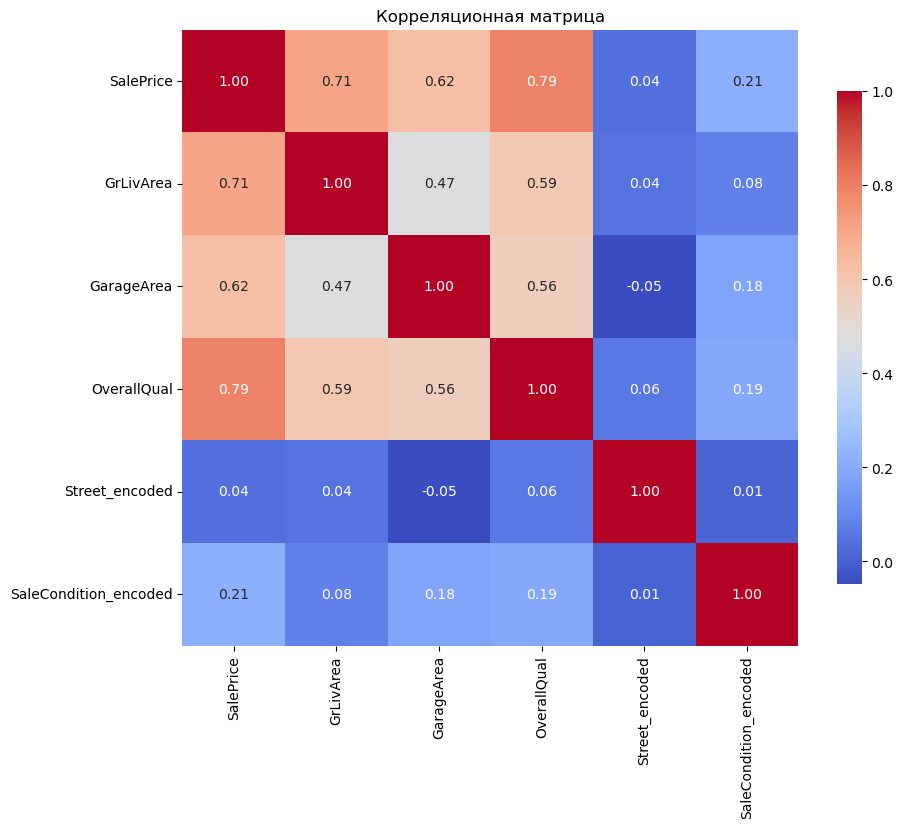

In [56]:
# Визуализация распределения нескольких выбранных числовых переменных
correlation_matrix_selected_columns = ['SalePrice', 'GrLivArea', 'GarageArea', 'OverallQual', 'Street_encoded', 'SaleCondition_encoded']

# Визуализация корреляции между выбранными переменными
correlation_matrix = df_encoder[correlation_matrix_selected_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица')
plt.show()

In [58]:
numerical_columns = ['SalePrice', 'GrLivArea', 'GarageArea', 'OverallQual']

# Масштабирование числовых переменных
# Инициализация StandardScaler для стандартизации данных
scaler = StandardScaler()

# Масштабируем числовые переменные и преобразуем их в DataFrame
scaled_numerical = scaler.fit_transform(df[numerical_columns])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [60]:
# Определение независимых и зависимых переменных
X = scaled_numerical_df.drop(["SalePrice"], axis=1) # Независимые переменные
y = scaled_numerical_df['SalePrice']  # Зависимая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Выводим размеры
print(X)
print("Размер обучающего набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)

      GrLivArea  GarageArea  OverallQual
0      0.370333    0.351000     0.651479
1     -0.482512   -0.060731    -0.071836
2      0.515013    0.631726     0.651479
3      0.383659    0.790804     0.651479
4      1.299326    1.698485     1.374795
...         ...         ...          ...
1455   0.250402   -0.060731    -0.071836
1456   1.061367    0.126420    -0.071836
1457   1.569647   -1.033914     0.651479
1458  -0.832788   -1.090059    -0.795151
1459  -0.493934   -0.921624    -0.795151

[1460 rows x 3 columns]
Размер обучающего набора: (1168, 3)
Размер тестового набора: (292, 3)


In [62]:
# Построение модели линейной регрессии
model = LinearRegression()

# Обучение модели на обучающей выборке
model.fit(X_train, y_train)

LinearRegression()

In [64]:
# Предсказание цен на обучающей выборке
y_train_pred = model.predict(X_train)

# Расчет метрик качества на обучающей выборке
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

# Вывод результатов
print('MAE на обучающей выборке:', mae_train)
print('MSE на обучающей выборке:', mse_train)

MAE на обучающей выборке: 0.3361514443682915
MSE на обучающей выборке: 0.25468078256020205


In [66]:
# Предсказание цен на тестовой выборке
y_test_pred = model.predict(X_test)

# Расчет метрик качества на тестовой выборке
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Вывод результатов
print('MAE на тестовой выборке:', mae_test)
print('MSE на тестовой выборке:', mse_test)

MAE на тестовой выборке: 0.34203976784974943
MSE на тестовой выборке: 0.2875232661450608


Стандартизация данных оказалась важной для успешного обучения модели. Поскольку признаки имеют разные масштабы, им требуется стандартизация, которая помогает модели адекватно понимать данные. Значения MAE и MSE на тестовой выборке немного выше, чем на обучающей выборке, что может указывать на небольшое переобучение модели.